In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
a = tf.constant(2.0)
y = tf.constant(8.0)
x = tf.Variable(10.0)

print(a)
print(x)



loss = tf.math.abs(a*x - y)
loss

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [16]:
loss.numpy()

12.0

In [17]:
def train_func():
    with tf.GradientTape() as tape:
        loss = tf.math.abs(a*x - y)

    dx = tape.gradient(loss, x)
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    x.assign(x - dx) # x = x - dx
# Run train_func() UDF repeately
for i in range(4):
    train_func()

x = 10.0, dx = 2.0
x = 8.0, dx = 2.0
x = 6.0, dx = 2.0
x = 4.0, dx = 0.0


GradientTape : https://www.tensorflow.org/guide/autodiff?hl=ko

In [18]:
%%time
# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
# 계수 설정 : 초기값
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 학습
histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])

    w1.assign_sub(lr*dw1) # w1 = w1 - lr * dw1 => w1 -= lr*dw1
    #w1.assign(w1 - lr*dw1)
    w2.assign_sub(lr*dw2)
    b.assign_sub(lr*db)


    histLoss.append(loss)
    if epoch % 500 == 0:
        print("epoch = {}, loss = {}".format(epoch, loss))


epoch = 0, loss = 15.339600563049316
epoch = 500, loss = 3.654714584350586
epoch = 1000, loss = 2.3881609439849854
epoch = 1500, loss = 2.092434883117676
epoch = 2000, loss = 1.8692306280136108
epoch = 2500, loss = 1.6479506492614746
epoch = 3000, loss = 1.426693320274353
epoch = 3500, loss = 1.2054353952407837
epoch = 4000, loss = 0.9841771721839905
epoch = 4500, loss = 0.7629193067550659
epoch = 5000, loss = 0.5416615009307861
epoch = 5500, loss = 0.3204036056995392
epoch = 6000, loss = 0.09914541989564896
epoch = 6500, loss = 0.06283137202262878
epoch = 7000, loss = 0.06284035742282867
epoch = 7500, loss = 0.06293746829032898
epoch = 8000, loss = 0.06293746829032898
epoch = 8500, loss = 0.06293746829032898
epoch = 9000, loss = 0.06293746829032898
epoch = 9500, loss = 0.06293746829032898
CPU times: user 12.9 s, sys: 103 ms, total: 13 s
Wall time: 13 s



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


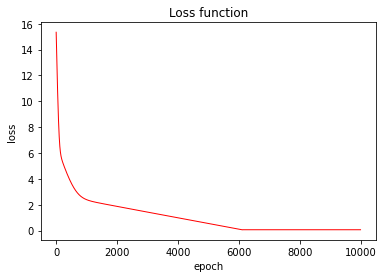

In [19]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum

In [20]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate=0.001, momentum=0.7, nesterov=False)

histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

    grads = tape.gradient(loss, var_list)
    opt.apply_gradients(zip(grads, var_list))

    if epoch % 500 == 0:
        histLoss.append(loss.numpy())
        print("epoch = {}, loss = {:.4f}".format(epoch, loss))



epoch = 0, loss = 15.3396
epoch = 500, loss = 2.0233
epoch = 1000, loss = 1.2854
epoch = 1500, loss = 0.5479
epoch = 2000, loss = 0.0376
epoch = 2500, loss = 0.0376
epoch = 3000, loss = 0.0376
epoch = 3500, loss = 0.0376
epoch = 4000, loss = 0.0376
epoch = 4500, loss = 0.0376
epoch = 5000, loss = 0.0376
epoch = 5500, loss = 0.0376
epoch = 6000, loss = 0.0376
epoch = 6500, loss = 0.0376
epoch = 7000, loss = 0.0376
epoch = 7500, loss = 0.0376
epoch = 8000, loss = 0.0376
epoch = 8500, loss = 0.0376
epoch = 9000, loss = 0.0376
epoch = 9500, loss = 0.0376
CPU times: user 16.7 s, sys: 115 ms, total: 16.8 s
Wall time: 16.8 s


## ↳ 전체 걸리는 시간이 더 걸리더라도 수렴하는 속도가 빠르다


추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0363


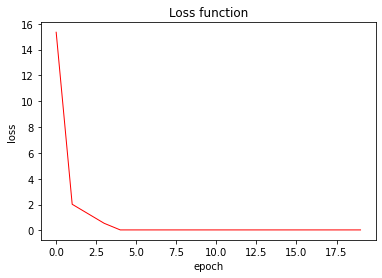

In [22]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [23]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [24]:
def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

opt = optimizers.Adam(learning_rate=0.01)

histLoss = []
for epoch in range(10000):
    opt.minimize(loss, var_list=[w1, w2, b])

    histLoss.append(loss())
    if epoch % 500 == 0:
        print("epoch : {}, loss = {}".format(epoch, histLoss[-1]))

epoch : 0, loss = 15.220072746276855
epoch : 500, loss = 0.010631668381392956
epoch : 1000, loss = 0.0074294814839959145
epoch : 1500, loss = 0.006808997597545385
epoch : 2000, loss = 0.006540192291140556
epoch : 2500, loss = 0.0064633674919605255
epoch : 3000, loss = 0.006436008960008621
epoch : 3500, loss = 0.006399292964488268
epoch : 4000, loss = 0.006382778752595186
epoch : 4500, loss = 0.006392806302756071
epoch : 5000, loss = 0.006400494836270809
epoch : 5500, loss = 0.0064014047384262085
epoch : 6000, loss = 0.006395809818059206
epoch : 6500, loss = 0.006383949890732765
epoch : 7000, loss = 0.006384304724633694
epoch : 7500, loss = 0.00638403557240963
epoch : 8000, loss = 0.006378864403814077
epoch : 8500, loss = 0.006378872320055962
epoch : 9000, loss = 0.006378864403814077
epoch : 9500, loss = 0.006375405006110668



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


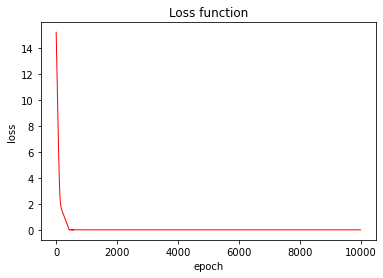

In [25]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras 
## Sequential model




Train on 100 samples
Epoch 1/300
100/100 [==============================] - 0s 60us/sample - loss: 79.6707
Epoch 2/300
100/100 [==============================] - 0s 65us/sample - loss: 23.5308
Epoch 3/300
100/100 [==============================] - 0s 62us/sample - loss: 11.8399
Epoch 4/300
100/100 [==============================] - 0s 62us/sample - loss: 7.6242
Epoch 5/300
100/100 [==============================] - 0s 65us/sample - loss: 5.2684
Epoch 6/300
100/100 [==============================] - 0s 61us/sample - loss: 3.7434
Epoch 7/300
100/100 [==============================] - 0s 66us/sample - loss: 2.8033
Epoch 8/300
100/100 [==============================] - 0s 79us/sample - loss: 2.1693
Epoch 9/300
100/100 [==============================] - 0s 61us/sample - loss: 1.3450
Epoch 10/300
100/100 [==============================] - 0s 63us/sample - loss: 0.8960
Epoch 11/300
100/100 [==============================] - 0s 68us/sample - loss: 0.6317
Epoch 12/300
100/100 [==============

100/100 [==============================] - 0s 50us/sample - loss: 0.0023
Epoch 95/300
100/100 [==============================] - 0s 55us/sample - loss: 0.1335
Epoch 96/300
100/100 [==============================] - 0s 48us/sample - loss: 0.2004
Epoch 97/300
100/100 [==============================] - 0s 44us/sample - loss: 8.5005e-06
Epoch 98/300
100/100 [==============================] - 0s 50us/sample - loss: 0.1362
Epoch 99/300
100/100 [==============================] - 0s 51us/sample - loss: 8.7850e-05
Epoch 100/300
100/100 [==============================] - 0s 44us/sample - loss: 0.2552
Epoch 101/300
100/100 [==============================] - 0s 47us/sample - loss: 0.0046
Epoch 102/300
100/100 [==============================] - 0s 46us/sample - loss: 0.0206
Epoch 103/300
100/100 [==============================] - 0s 54us/sample - loss: 0.1645
Epoch 104/300
100/100 [==============================] - 0s 43us/sample - loss: 0.0195
Epoch 105/300
100/100 [==============================]

100/100 [==============================] - 0s 56us/sample - loss: 1.9420e-05
Epoch 188/300
100/100 [==============================] - 0s 54us/sample - loss: 5.0309e-04
Epoch 189/300
100/100 [==============================] - 0s 41us/sample - loss: 0.2748
Epoch 190/300
100/100 [==============================] - 0s 52us/sample - loss: 1.3020e-04
Epoch 191/300
100/100 [==============================] - 0s 45us/sample - loss: 9.9882e-04
Epoch 192/300
100/100 [==============================] - 0s 48us/sample - loss: 0.1313
Epoch 193/300
100/100 [==============================] - 0s 44us/sample - loss: 0.3097
Epoch 194/300
100/100 [==============================] - 0s 55us/sample - loss: 5.1772e-04
Epoch 195/300
100/100 [==============================] - 0s 52us/sample - loss: 0.0038
Epoch 196/300
100/100 [==============================] - 0s 44us/sample - loss: 0.1532
Epoch 197/300
100/100 [==============================] - 0s 54us/sample - loss: 0.0669
Epoch 198/300
100/100 [==============

100/100 [==============================] - 0s 50us/sample - loss: 0.1383
Epoch 281/300
100/100 [==============================] - 0s 45us/sample - loss: 0.1258
Epoch 282/300
100/100 [==============================] - 0s 49us/sample - loss: 0.0627
Epoch 283/300
100/100 [==============================] - 0s 54us/sample - loss: 0.0010
Epoch 284/300
100/100 [==============================] - 0s 46us/sample - loss: 0.1527
Epoch 285/300
100/100 [==============================] - 0s 45us/sample - loss: 0.0185
Epoch 286/300
100/100 [==============================] - 0s 59us/sample - loss: 0.2426
Epoch 287/300
100/100 [==============================] - 0s 46us/sample - loss: 2.8680e-04
Epoch 288/300
100/100 [==============================] - 0s 43us/sample - loss: 8.5188e-06
Epoch 289/300
100/100 [==============================] - 0s 53us/sample - loss: 0.2615
Epoch 290/300
100/100 [==============================] - 0s 61us/sample - loss: 6.7678e-05
Epoch 291/300
100/100 [======================

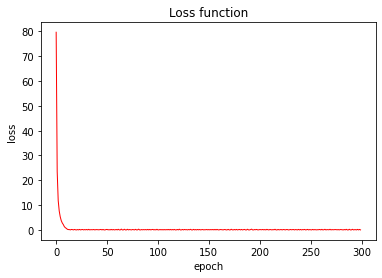

In [51]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.
model = Sequential()
model.add(Dense(1, input_dim = 2))
model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.05))
print(model)
print("\n\n")
h = model.fit(dataX, y, batch_size=10, epochs=300)
# 학습 결과를 확인한다.
parameters = model.layers[0].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## Functional API

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   
xInput = Input(batch_shape=(None))
model.add(Dense(1, input_dim = 2))
model.compile(loss='rmse', optimizer = optimizers.Adam(lr=0.05))

# 학습 결과를 확인한다.
parameters = model.layers[1].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

IndexError: list index out of range

# tensorflow 1.4로 iris 분류

In [31]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [33]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [34]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [35]:
# X와 y를 저장할 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [36]:
# Weight와 bias를 저장할 변수 선언
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [37]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [38]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [39]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [40]:
init = tf.global_variables_initializer()

In [41]:
sess = tf.Session()
sess.run(init)

In [42]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.0986123
10000 0.34161022
20000 0.25733852
30000 0.2140632
40000 0.18752664
50000 0.16956554
60000 0.15657532
70000 0.146726
80000 0.13898851
90000 0.1327386


In [43]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [44]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [45]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778


# Keras 

In [46]:
import tensorflow as tf

In [47]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [48]:
%time


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 5.96 µs


In [49]:

%time


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 6.91 µs


# Functional API

In [50]:
i     = Input(shape=(n_features,)) # 입력레이어
n     = Dense(10)(i)
n     = Dense(8)(n)
o     = Dense(3, activation='softmax')(n) # 출력레이어
model = Model(inputs=i, outputs=o) # 모델을 만든다

NameError: name 'n_features' is not defined

In [ ]:
%time
